In [33]:
import pandas as pd
from SIC2023_resolution import *

names=['entry_id', 'dep_date', 'status_code', 'method', 'title', 'keywords', 'other_keywords']
entry_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/entry_info.csv', sep=';', names=names)

In [34]:
import pandas as pd
from SIC2023_resolution import *
import os

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

df = df.drop_duplicates(subset='sugar_entry')

cazy_entries = df[['sugar_entry', 'Family']]
cazy_entries['sugar_entry'] = cazy_entries['sugar_entry'].str.upper()

family_names = {
    'AA': 'Auxiliary Activities',
    'GH': 'Glycoside Hydrolases',
    'CBM': 'Carbohydrate-Binding Modules',
    'GT': 'Glycosyltransferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

cazy_entries['Family'] = cazy_entries['Family'].replace(family_names)

#Merge

entry_df = entry_df.merge(cazy_entries, how='left', left_on='entry_id', right_on='sugar_entry')
entry_df = entry_df.drop(columns=['sugar_entry'])

#Completa com classificação comum do PDB

entry_df['Family'] = entry_df['Family'].fillna(entry_df['keywords'])

In [35]:
entry_df['Family'] = entry_df['Family'].str.upper()

classif_df = entry_df[['entry_id', 'Family']]
classif_df.columns = ['entry_id', 'type']

In [36]:
mon_names = ['sugar','iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id','entry_resolution', 'is_in_cazy']
mon_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/all_monossacharide_df_without_missing.csv', header=None, names=mon_names)

mon_df['entry_id'] = mon_df['entry_id'].str.upper()

#Merge
mon_df = mon_df.merge(classif_df, how='left', left_on='entry_id', right_on='entry_id')
#mon_df = mon_df.drop(columns=['entry_id'])


In [37]:
#To_csv

mon_df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/all_monossacharide_df_without_missing.csv', header=None, sep=';')
entry_df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/entry_info.csv', header=None, sep=';')

In [6]:
#Read methods
import pandas as pd

method_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/methods.txt", header=None, names = ['entry_filename', 'method'], sep=',')

em_sugars = method_df.loc[method_df['method'] == 'ELECTRON MICROSCOPY']['entry_filename'].values

Análise pro TCC dos parâmetros das entradas do PDB contendo açúcares

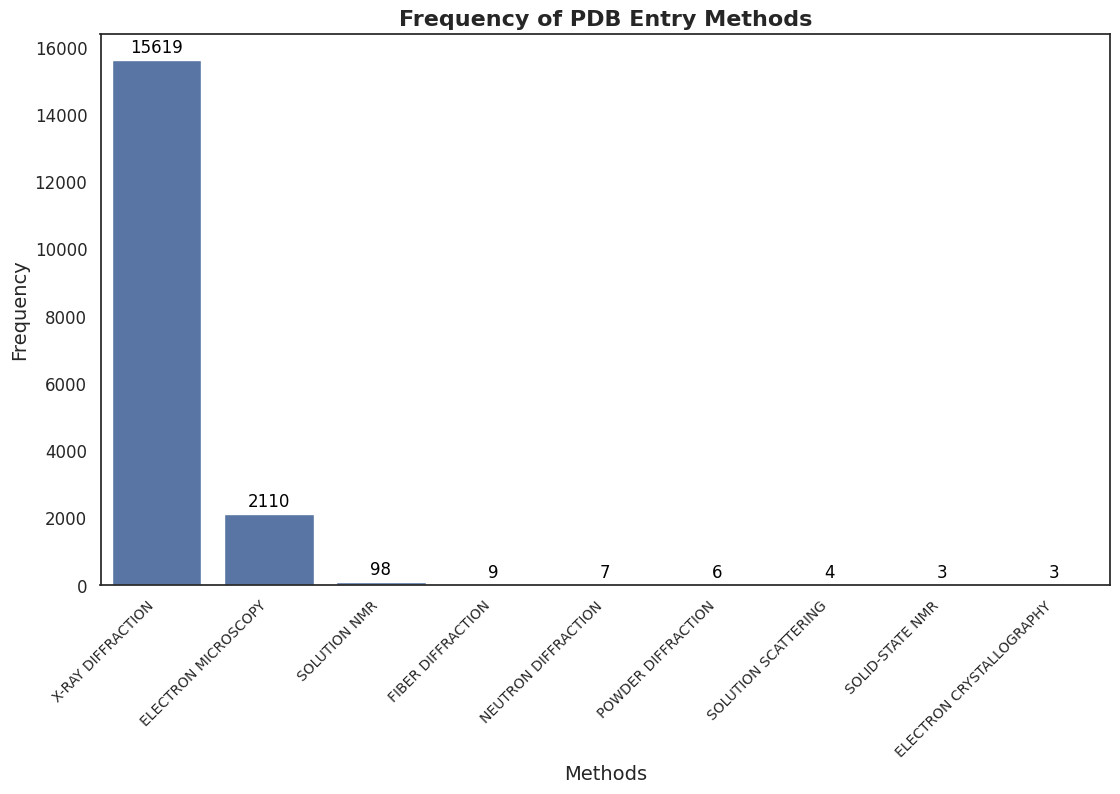

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que method_df seja seu DataFrame
# method_df['method'] contém os métodos que você quer mostrar no gráfico

# Contar a frequência de cada método
method_counts = method_df['method'].value_counts()

# Definir o estilo do gráfico (sem grid)
sns.set(style="white")  # Define o estilo sem a grid

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))  # Aumenta a altura do gráfico para dar mais espaço
ax = sns.barplot(x=method_counts.index, y=method_counts.values)

# Adicionar título e rótulos em inglês
ax.set_title('Frequency of PDB Entry Methods', fontsize=16, fontweight='bold')
ax.set_xlabel('Methods', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Melhorar a formatação das legendas (rotacionando as labels para melhor legibilidade)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Adicionar valores nas barras para maior clareza
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

# Ajustar o layout para evitar corte e aumentar o espaço superior
plt.tight_layout(pad=3.0)  # Aumenta o espaço entre os elementos
plt.subplots_adjust(top=1)  # Ajusta a margem superior para dar mais espaço

# Exibir o gráfico
plt.show()


In [2]:
#Tabela de resolução
import pandas as pd
res_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/resolution_all.csv", header=None, names = ['entry_id', 'resolution'], sep=';')

entry_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbo_entrys_nd.txt', names = ['entry_filename'])
entry_df['entry_filename'] = entry_df['entry_filename'].str.replace('.cif', '')
entry_df['entry_filename'] = entry_df['entry_filename'].str.upper()
entries = entry_df['entry_filename'].values

entrada_faltando = list(set(entries) - set(res_df['entry_id'].values))
#3JQ2
entry_3jq2 = pd.DataFrame([['3J2Q', 15]], columns=["entry_id", "resolution"])
res_df = pd.concat([res_df, entry_3jq2], ignore_index=True)

#To numeric
res_df['resolution'] = pd.to_numeric(res_df['resolution'], errors='coerce')

#Remove invalid
res_df = res_df.loc[res_df['resolution'] != -1]

#Valores
less_than_1 = res_df.loc[res_df['resolution'] <= 1]
less_than_1_5 = res_df.loc[(res_df['resolution'] > 1) & (res_df['resolution'] <= 1.5)]
less_than_2 = res_df.loc[(res_df['resolution'] > 1.5) & (res_df['resolution'] <= 2)]
less_than_2_5 = res_df.loc[(res_df['resolution'] > 2) & (res_df['resolution'] <= 2.5)]
less_than_3_5 = res_df.loc[(res_df['resolution'] > 2.5) & (res_df['resolution'] <= 3.5)]
less_than_5 = res_df.loc[(res_df['resolution'] > 3.5) & (res_df['resolution'] <= 5)]
greater_than_5 = res_df.loc[res_df['resolution'] > 5]



resolution_table = pd.DataFrame({
    "Range": ['R ≤ 1', '1.0 <R ≤ 1.5', '1.5 <R ≤ 2.0', '2.0 <R ≤ 2.5', '2.5 <R ≤ 3.5', '3.5 <R ≤ 5.0', 'R ≥ 5.0'],
    "Count": [less_than_1.shape[0], less_than_1_5.shape[0], less_than_2.shape[0], less_than_2_5.shape[0], less_than_3_5.shape[0], less_than_5.shape[0], greater_than_5.shape[0]]
})

resolution_table['Percent'] = (resolution_table['Count'] / resolution_table['Count'].sum()) * 100 

print(resolution_table['Percent'].sum())
print(resolution_table['Count'].sum())

100.0
17748


Abundância dos tipos de ligação:
  bond_type  count
0     (1-2)      3
1     (1-4)      4
2     (1-3)      3
3     (1-6)      3


/tmp/ipykernel_3663416/942800537.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonds'] = df['structures'].apply(extract_bonds)


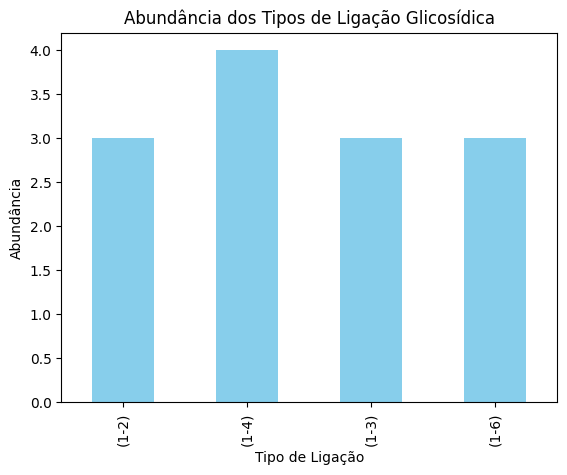

In [27]:
import pandas as pd
import re
from collections import Counter

# Carregar o CSV (ajuste o caminho conforme necessário)
branched_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/final_analysis/branched.csv", sep=';', 
                          names=['entity_id', 'entity_type', 'structures', 'n_of_molecules', 'entry_id'])

df = branched_df.head(3)

# 2. Função para extrair ligações glicosídicas
def extract_bonds(structure):
    """
    Extrai todas as ligações glicosídicas no formato (1-x) de uma estrutura.
    """
    return re.findall(r'\(1-\d\)', structure)

# Aplicar a função na coluna 'structures'
df['bonds'] = df['structures'].apply(extract_bonds)

# 3. Contar a abundância total de cada tipo de ligação
bond_counts = Counter()
for bonds in df['bonds']:
    bond_counts.update(bonds)

# Converter o resultado para um DataFrame
bond_counts_df = pd.DataFrame.from_dict(bond_counts, orient='index', columns=['count'])
bond_counts_df.index.name = 'bond_type'
bond_counts_df.reset_index(inplace=True)

# Exibir os resultados
print("Abundância dos tipos de ligação:")
print(bond_counts_df)

# 4. Visualizar os resultados em um gráfico de barras
bond_counts_df.plot(kind='bar', x='bond_type', y='count', legend=False, color='skyblue')
plt.xlabel('Tipo de Ligação')
plt.ylabel('Abundância')
plt.title('Abundância dos Tipos de Ligação Glicosídica')
plt.show()


Contagem geral dos tipos de ligação considerando a multiplicação por moléculas:
    bond_type  total_count
0   alpha_1-2         3390
1   alpha_1-4         5722
2   alpha_1-3         8903
3    beta_1-2         1345
4   alpha_1-6         9621
5    beta_1-4        51386
6    beta_1-6          751
7    beta_1-3         2043
8    beta_5-4            5
9    beta_2-1          822
10  alpha_1-1          232
11   beta_1-1           22
12   beta_6-8            1
13  alpha_1-5          111
14  alpha_2-3            4
15   beta_4-4           17
16   beta_2-6           55
17   beta_2-4            1
18  alpha_2-6           10
19  alpha_5-6            2
20  alpha_6-1            1
21   beta_3-4            5
22   beta_3-3            1
23   beta_4-3            3
24  alpha_6-4            2
25  alpha_3-3            2
26  alpha_2-1            9
27  alpha_4-1            1
28  alpha_3-6            1


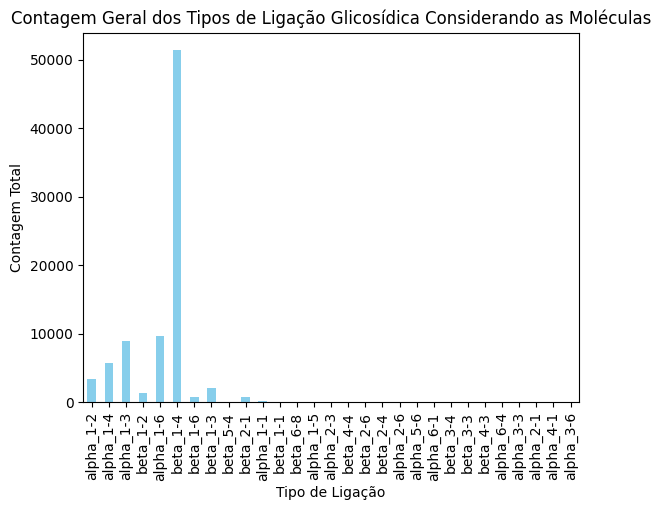

In [42]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Carregar o CSV (ajuste o caminho conforme necessário)
branched_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/final_analysis/branched.csv", sep=';', 
                          names=['entity_id', 'entity_type', 'structures', 'n_of_molecules', 'entry_id'])

df = branched_df

# Converter a coluna 'n_of_molecules' para numérico (caso haja algum valor não numérico, será convertido para NaN)
df['n_of_molecules'] = pd.to_numeric(df['n_of_molecules'], errors='coerce')

# 2. Função para extrair ligações glicosídicas com diferenciação alfa e beta
def extract_bonds(structure):
    """
    Extrai todas as ligações glicosídicas no formato (1-x) de uma estrutura,
    diferenciando ligações alfa e beta com base no tipo de açúcar.
    """
    # Regex para capturar o tipo de açúcar (alpha ou beta) e a ligação (1-2, 1-4, etc.)
    bonds = re.findall(r'(alpha|beta)-[LD]-([a-zA-Z]+)-\((\d+-\d+)\)', structure)
    
    bond_types = []
    for bond in bonds:
        bond_type, sugar, bond_number = bond  # 'alpha' ou 'beta', nome do açúcar, e a ligação (1-2, 1-4, etc.)
        if bond_type == 'alpha':
            bond_types.append(f'alpha_{bond_number}')
        elif bond_type == 'beta':
            bond_types.append(f'beta_{bond_number}')
        else:
            bond_types.append(f'outro_{bond_number}')  # Caso haja outro tipo, pode ser ajustado
    return bond_types

# Função para contar as ligações em cada linha e armazenar como dicionário
def count_bonds_in_row(bonds_list):
    """
    Conta a quantidade de cada tipo de ligação em uma lista de ligações.
    Retorna um dicionário com a contagem das ligações.
    """
    return dict(Counter(bonds_list))

# Função para juntar as ligações em um dicionário de contagens
def join_bonds_to_dict(bonds_list):
    """
    Junta todas as ligações extraídas de uma estrutura e cria um dicionário
    com a contagem de cada tipo de ligação.
    """
    return dict(Counter(bonds_list))

# Função para multiplicar os valores do dicionário pelas moléculas
def multiply_bonds_by_molecules(bonds_dict, n_of_molecules):
    """
    Multiplica os valores do dicionário de ligações pelo número de moléculas.
    """
    return {key: count * n_of_molecules for key, count in bonds_dict.items()}

# Aplicar a função de extração de ligações na coluna 'structures'
df['bonds'] = df['structures'].apply(extract_bonds)

# Criar uma nova coluna 'bonds_count_dict' com a contagem das ligações
df['bonds_count_dict'] = df['bonds'].apply(join_bonds_to_dict)

# Criar uma nova coluna 'bonds_count_mol_dict' multiplicando os valores do dicionário pelo valor de 'n_of_molecules'
df['bonds_count_mol_dict'] = df.apply(lambda row: multiply_bonds_by_molecules(row['bonds_count_dict'], row['n_of_molecules']), axis=1)

# Contagem geral dos tipos de ligação, levando em consideração a coluna 'bonds_count_mol_dict'
total_bond_counts = Counter()

# Somar as contagens das ligações multiplicadas por moléculas
for bond_dict in df['bonds_count_mol_dict']:
    total_bond_counts.update(bond_dict)

# Converter o resultado para um DataFrame
total_bond_counts_df = pd.DataFrame.from_dict(total_bond_counts, orient='index', columns=['total_count'])
total_bond_counts_df.index.name = 'bond_type'
total_bond_counts_df.reset_index(inplace=True)

# Exibir os resultados gerais das contagens
print("Contagem geral dos tipos de ligação considerando a multiplicação por moléculas:")
print(total_bond_counts_df)

# 4. Visualizar os resultados em um gráfico de barras
total_bond_counts_df.plot(kind='bar', x='bond_type', y='total_count', legend=False, color='skyblue')
plt.xlabel('Tipo de Ligação')
plt.ylabel('Contagem Total')
plt.title('Contagem Geral dos Tipos de Ligação Glicosídica Considerando as Moléculas')
plt.show()
